# Technical Analysis Deliverable 1: A Summary DataFrame

In [416]:
# Add Matplotlib inline command
%matplotlib inline

# import dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import os

In [417]:
# Load files and Read Data

city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [418]:
# Merge the DataFrames

pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [419]:
# Get the unique values of the type of city

city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [420]:
# Create separate DataFrames for Urban, Suburban, and Rural data

urban_cities_df = pyber_data_df[pyber_data_df['type'] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == "Subrban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == "Rural"]

In [421]:
# Find total rides per city type

total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [422]:
# Find total drivers per city type

total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [423]:
# Calculate total fares by city type

total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [424]:
# Calculate average fare per ride by city type

average_fare_per_ride = pyber_data_df.groupby(['type']).mean()['fare']
average_fare_per_ride           

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [425]:
# Calculate average fare by driver by city type

average_fare_per_driver = total_fares/total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [426]:
# create Summary DataFrame

summary_df = pd.DataFrame({
            "Total Rides": total_rides, 
            "Total Drivers": total_drivers, 
            "Total Fares": total_fares, 
            "Average Fare Per Ride": average_fare_per_ride, 
            "Average Fare Per Driver": average_fare_per_driver})

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [427]:
# Format Summary DataFrame

# Remove index
summary_df.index.name = None

# add thousands comma to Total Rides and Total Drivers
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)

summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)

summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)

summary_df["Average Fare Per Ride"] = summary_df["Average Fare Per Ride"].map("${:,.2f}".format)

summary_df["Average Fare Per Driver"] = summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

In [428]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

In [429]:
# Rename DataFrame columns

pyber_data_df.rename(columns=
                     {'city':'City', 
                      'date':'Date',
                      'fare':'Fare', 
                      'ride_id': 'Ride Id',
                      'driver_count': 'No. Drivers', 
                      'type':'City Type'}, inplace=True)

pyber_data_df.head()


,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [430]:
# Set the Index to the date column

pyber_data_df = pyber_data_df.set_index('Date')

pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [431]:
# Create a new DataFrame with Date as the index, and City type and Fare as columns

pyber_fare_data_df = pyber_data_df[['City Type', 'Fare']].copy()
pyber_fare_data_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [432]:
# Check the data type of the index

pyber_fare_data_df.index.dtype

dtype('O')

In [433]:
# Check the data type of the new DataFrame

pyber_fare_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [434]:
# Convert index (Date) to datetime data type

pyber_fare_data_df.index = pd.to_datetime(pyber_fare_data_df.index)

In [435]:
# Check the data type of the index to make sure it was converted to datetime

pyber_fare_data_df.index.dtype

dtype('<M8[ns]')

In [436]:
pyber_fare_data_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [437]:
# Calculate total fares by type of city and date

total_fares = pd.Series(pyber_fare_data_df.groupby(['Date', 'City Type']).sum()['Fare'])
total_fares

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
2019-01-01 02:07:24  Suburban     24.07
2019-01-01 03:46:50  Urban         7.57
2019-01-01 05:23:21  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:49  Urban        18.45
2019-05-08 07:29:01  Urban        18.55
2019-05-08 11:38:35  Urban        19.77
2019-05-08 13:10:18  Urban        18.04
Name: Fare, Length: 2375, dtype: float64

In [438]:
# Create a new DataFrame out of the total_fares series

total_fares_df = pd.DataFrame(total_fares)
total_fares_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [439]:
# Pivot table DataFrame with the Date as the index and columns as 'City Type'

total_fares_pivot = pd.pivot_table(total_fares_df, values='Fare', index='Date', columns=['City Type'])
total_fares_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [440]:
# Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28', using loc

date_pivot = total_fares_pivot.loc['2019-01-01':'2019-04-28']
date_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [441]:
weekly_resampled_data = date_pivot.resample('W').sum()
weekly_resampled_data

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


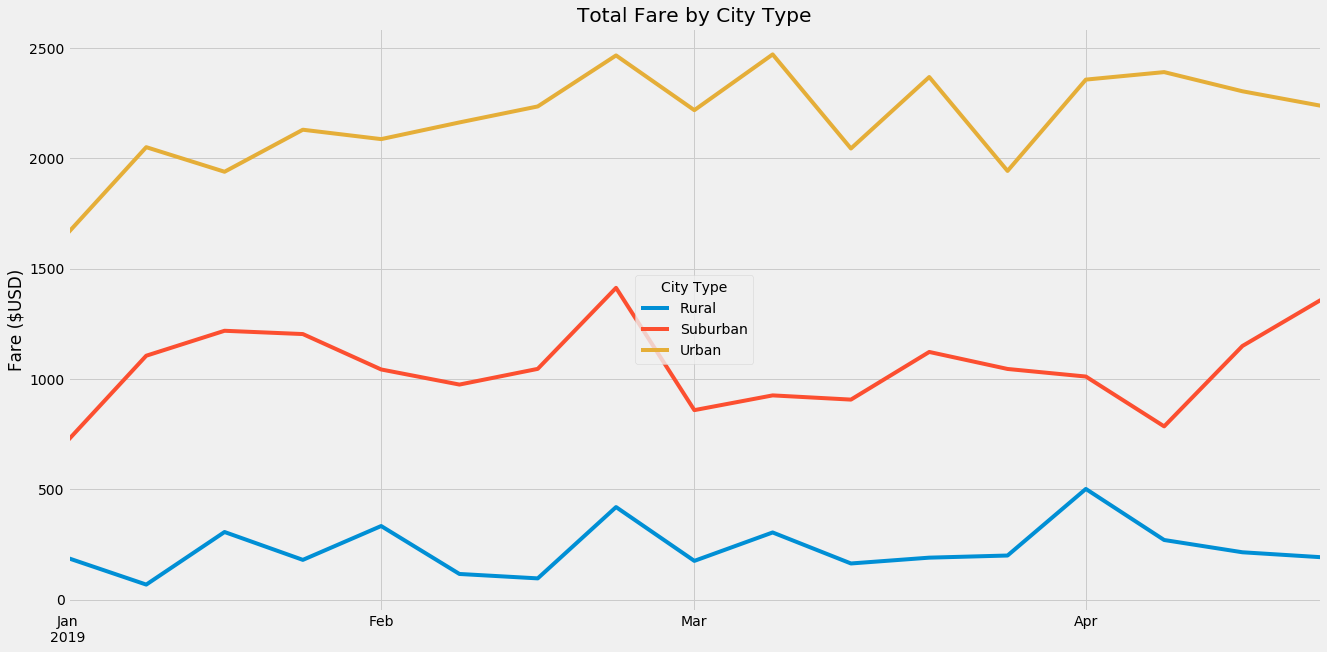

In [451]:
# Create a line chart for the weekly data using object-oriented interface method

# style to use
plt.style.use('fivethirtyeight')

ax = weekly_resampled_data.plot(figsize=(20,10), label='City Type')

# Add labels
ax.set_xlabel('')
ax.set_ylabel('Fare ($USD)')
ax.set_title('Total Fare by City Type')

# Add/Format Legend
ax.legend(loc='center', title='City Type')

# Save Figure
plt.savefig("Total_Fare_by_City_Type.png")

plt.show()